# Preprocessing the Data

In [1]:
import pandas as pd
import numpy as np
import os
import glob
from IPython.display import Image,display

In [ ]:
!pip install ultralytics

In [ ]:
! pip install kaggle
!kaggle datasets download -d vlbthambawita/visemtracking
! unzip visemtracking.zip

CREATING THE DATA DIRECTORY


In [4]:
path_data = "data/"
os.mkdir("/content/data/")
paths = ["images/train/","images/test/","images/val/","labels/train/","labels/test/","labels/val/"]
os.mkdir("data/images")
os.mkdir("data/labels")

In [5]:
for path in paths:
  os.mkdir(os.path.join(path_data, path))

In [6]:
def split_train_val(lendata,train_ratio,val_ratio):
  shuffled_indices = np.random.permutation(lendata)

  train_set_size = int(lendata*train_ratio)
  val_set_size = int(lendata*val_ratio)

  train_ind = shuffled_indices[:train_set_size]
  val_ind = shuffled_indices[train_set_size:train_set_size+val_set_size]
  test_ind = shuffled_indices[train_set_size+val_set_size:]

  print(f"train size : {len(train_ind)}")
  print(f"test size : {len(test_ind)}")
  print(f"val size : {len(val_ind)}")

  return train_ind,test_ind,val_ind


train,test,val = split_train_val(1440,0.7,0.2)

train size : 1007
test size : 145
val size : 288


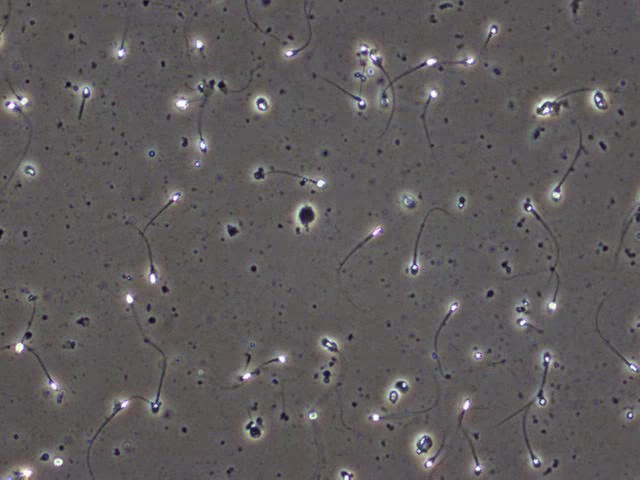

In [8]:
import shutil
path = "/content/VISEM_Tracking_Train_v4/Train/"+str(11)+"/images/"+str(11)+"_frame_"+str(10)+".jpg"
display(Image(filename=path, height = 600))

**tRANSFERING THE TRAIN DATA FROM THE VISEM FILE TO TRAIN,TEST,and VALIDATION**

In [9]:
elm_path = [11,12,13,14,15,19,21,22,24,29,30,35,36,38,47,52,54,60,82]

for i in elm_path:
  a=0
  for j in train :
    # train img
    path = "/content/VISEM_Tracking_Train_v4/Train/"+str(i)+"/images/"+str(i)+"_frame_"+str(j)+".jpg"
    path_new = "/content/data/images/train/"+str(i)+"_"+str(a)+".jpg"

    shutil.copyfile( path, path_new)

    #train label

    path = "/content/VISEM_Tracking_Train_v4/Train/"+str(i)+"/labels/"+str(i)+"_frame_"+str(j)+".txt"
    path_new = "/content/data/labels/train/"+str(i)+"_"+str(a)+".txt"

    shutil.copyfile( path , path_new)

    a+=1



In [10]:
for i in elm_path:
  a=0
  for j in val :
    # val img
    path = "/content/VISEM_Tracking_Train_v4/Train/"+str(i)+"/images/"+str(i)+"_frame_"+str(j)+".jpg"
    path_new = "/content/data/images/val/"+str(i)+"_"+str(a)+".jpg"

    shutil.copyfile( path, path_new)

    #val  label

    path = "/content/VISEM_Tracking_Train_v4/Train/"+str(i)+"/labels/"+str(i)+"_frame_"+str(j)+".txt"
    path_new = "/content/data/labels/val/"+str(i)+"_"+str(a)+".txt"

    shutil.copyfile( path , path_new)

    a+=1



In [11]:

for i in elm_path:
  a=0
  for j in test :
    # train img
    path = "/content/VISEM_Tracking_Train_v4/Train/"+str(i)+"/images/"+str(i)+"_frame_"+str(j)+".jpg"
    path_new = "/content/data/images/test/"+str(i)+"_"+str(a)+".jpg"

    shutil.copyfile( path, path_new)

    #train label

    path = "/content/VISEM_Tracking_Train_v4/Train/"+str(i)+"/labels/"+str(i)+"_frame_"+str(j)+".txt"
    path_new = "/content/data/labels/test/"+str(i)+"_"+str(a)+".txt"

    shutil.copyfile( path , path_new)



In [12]:
from ultralytics import YOLO

In [ ]:
model = YOLO("yolov8n.yaml")

results = model.train(data="config.yaml", epochs=200)

Ultralytics YOLOv8.2.8 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=config.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, 

train: Scanning /content/data/labels/train.cache... 19133 images, 0 backgrounds, 0 corrupt: 100%|██████████| 19133/19133 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/data/labels/val.cache... 5472 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5472/5472 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      4.93G      4.162       3.89      2.907        786        640:  36%|███▌      | 430/1196 [03:44<06:02,  2.11it/s]

TRACKING ON A VIDEO


In [ ]:
model = YOLO("/content/runs/detect/train2/weights/last.pt")

results  = model.predict('/content/visem-extracted-30s-excluding-selected-20/visem-extracted-30s-excluding-selected-20/16_90_120.mp4',save= True)
print(results[0])

print("==========================================")

for box in results[0].boxes:
  print(box)